# Predicting a heart disease using machine learning


these are the following approach that will be taken

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement

> Given clinical parameters about a patient, can we predict wheather they have heart disease or not.

## 2. Data

Create a data dictionary

> refer the folder in the project

## Preparing the tools

In [63]:
# import all the tools we need

# Regular EDA (Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import  confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Load the data 

In [6]:
df = pd.read_csv('C:\\Users\\user\\OneDrive\\Personal\\Tutorials\\New Data Analytics\\GetFreeCourses.Me-Udemy-Complete Machine Learning and Data Science Zero to Mastery\\11. Milestone Project 1 Supervised Learning (Binary Classification)\\6.1 heart-disease.csv.csv')
df.shape

(303, 14)

## Data exploration (exploratory data analysis or EDA)

The goal here is to find out more on the data and become the subject matter expert on the data your working with

1. what questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. what's missing from the data and how do we deal with it?
4. where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of your data?

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
#let us know that how many types of class are there
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

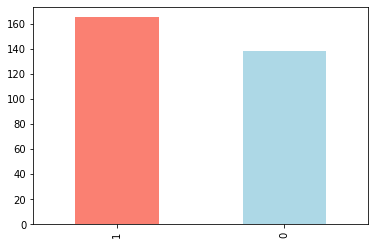

In [13]:
df['target'].value_counts().plot(kind="bar", color=['salmon', 'lightblue'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [17]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [18]:
# compare target column with sex column

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


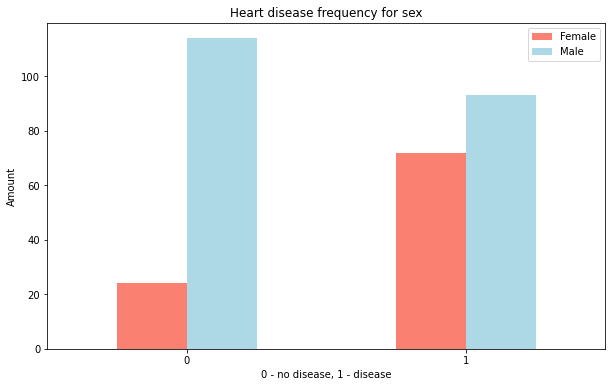

In [25]:
# Create a plot of crosstab

pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10, 6) , color=['salmon', 'lightblue'])

plt.title('Heart disease frequency for sex')
plt.xlabel('0 - no disease, 1 - disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

In [29]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Age vs Max heart rate for Heart disease

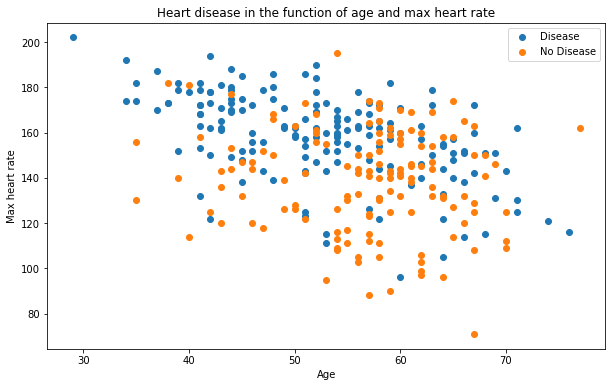

In [46]:
# Create and another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1])

# Scatter with negitive examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0])

# Add some helpful info
plt.title('Heart disease in the function of age and max heart rate')
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Disease', 'No Disease'])

## Heart disease Frequency per chestpain type

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

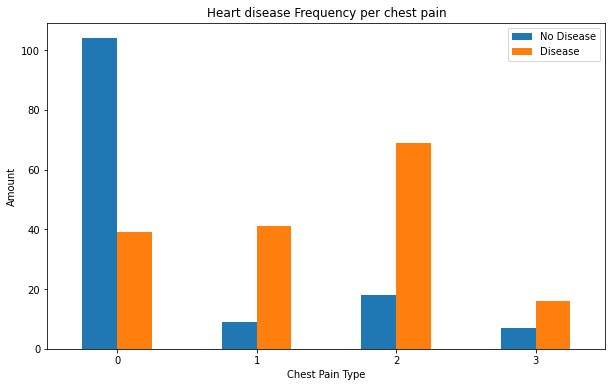

In [50]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10, 6))


# Add some communication
plt.title('Heart disease Frequency per chest pain')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0)

## Example to select the best Feature variable

In [51]:
# Make a correlation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


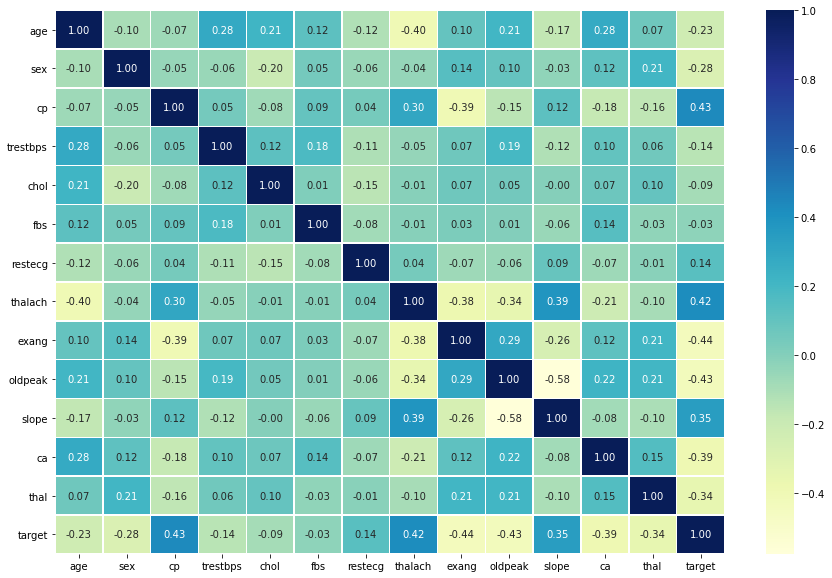

In [56]:
# Lets make our correlation matrix a little pritter

corr_mat = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(corr_mat, annot=True, linewidths=0.5, fmt='.2f', cmap='YlGnBu')

In [32]:
X = df.iloc[:,0:13]  #independent columns
y = df.iloc[:,-1]

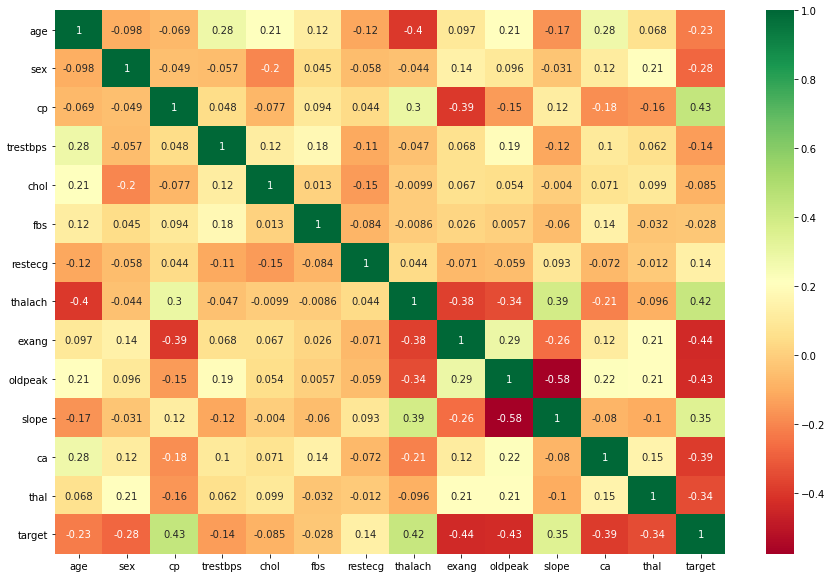

In [79]:
#Heat map plot to decide and select the best features

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [39]:
#Top 10 Best Features using SelectKBest class

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835


## Modelling

In [57]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
# Split data into x and y

x = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Now we have got our data split into training and test sets, its time to build a matchine learning model.

We will train it (find the patterns) on the training set.

And we will test it (use the patterns) on the test set.

we're going to try 3 different matchine learning models.
   
   1. Logistic Regression
   
   2. K-Nearest Classifier
   
   3. Random Forest Classifier

In [64]:
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(), 
         'Random Forest': RandomForestClassifier()}

In [67]:
def fit_and_score(models, x_train, x_test, y_train, y_test):
    '''
    Fits and evaluates matchine learning models.
    Models: a dict of various matchine learning models.
    x_train, y_train: training data
    x_test, y_test: testing data
    '''
    # Set a random seed
    np.random.seed(42)
    # Make dict to keep model score
    model_score = {}
    # Loop through models
    for name, model in models.items():
        
        #fit the model
        model.fit(x_train, y_train)
        
        #Evaluate the model and append its scores to the model scores
        model_score[name] = model.score(x_test, y_test)
        
    return model_score

In [68]:
model_scores = fit_and_score(models = models, x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test)

model_scores

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.7540983606557377,
 'KNN': 0.6065573770491803,
 'Random Forest': 0.7377049180327869}

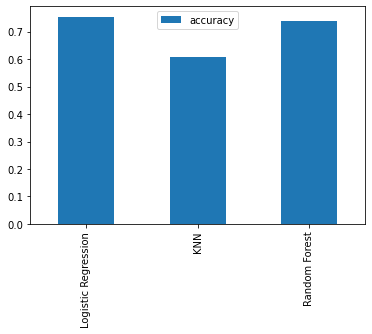

In [71]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

Now we have got a base line model...and we know the models first predictions arent always
what we should based our next steps off.
what should we do?

Let's look at the following:

* Hyperparameter tuning
* Feature Importance
* Confusion matrix
* Cross validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC curve
* Area under curve (AUC)

## Hyperparameter tuning

In [72]:
# Lets tune KNN
train_scores = []
test_scores = []

#Create a list of different values for n_neighbours
neighbors = range(1, 21)

#setup KNN instance
knn = KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the algorithm
    knn.fit(x_train, y_train)
    
    # update the training score list
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test score list
    test_scores.append(knn.score(x_test, y_test))

Maximum knn score on the data : 65.57%


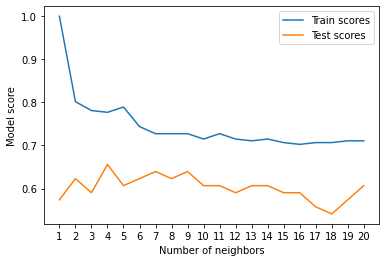

In [78]:
plt.plot(neighbors, train_scores, label='Train scores')
plt.plot(neighbors, test_scores, label='Test scores')
plt.xlabel('Number of neighbors')
plt.xticks(np.arange(1, 21))
plt.ylabel('Model score')
plt.legend()

print(f'Maximum knn score on the data : {max(test_scores) * 100:.2f}%')

## Hyperparameter tuning with RandomizedSearchCV

we are going to tune:

* LogisticRegrission()
* RandomForestClassifier()


........Using RandomizedCV

In [86]:
# Create a hyperparameter grid for LogisticRegrission
log_reg_grid = {'C': np.logspace(-4, 4, 20), "solver":['liblinear']}


#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50), "max_depth": [None, 3, 5, 10], 'min_samples_split': np.arange(2, 20, 2), 
          'min_samples_leaf': np.arange(1, 20, 2)}

In [82]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)


# Fit random hyperparameter search for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [83]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [84]:
rs_log_reg.score(x_test, y_test)

0.7704918032786885

Now we have tuned LogisticRegression() , Lets do this with RandomForestClassifier()

In [87]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)


rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [88]:
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 12,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [89]:
rs_rf.score(x_test, y_test)

0.7540983606557377

In [90]:
model_scores

{'Logistic Regression': 0.7540983606557377,
 'KNN': 0.6065573770491803,
 'Random Forest': 0.7377049180327869}

## Hyperparameters Tuning with GridSearchCV

In [91]:
# Create a hyperparameter grid for LogisticRegrission
log_reg_grid = {'C': np.logspace(-4, 4, 30), "solver":['liblinear']}


# Setup hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)


# Fit the hyperparameter
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.0s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [92]:
gs_log_reg.score(x_test, y_test)

0.7540983606557377

## Evaluating our tuned matchine learning classifier, beyond accuracy

* ROC Curve and AUC Score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score

.... and it would be great if cross validation was used if possible

To make comparisions and evaluate our trained model, first we need to make predictions